<a href="https://colab.research.google.com/github/SriAmbica11/SriAmbica_INFO5731_Spring2025/blob/main/Sangineedi_SriAmbica_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
#%%
import random
import numpy as np
from sklearn.datasets import fetch_20newsgroups
data_train = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'))
amb_assign4_data = np.array(data_train.data)
np.random.seed(42)
sample_idx = np.random.choice(len(amb_assign4_data), 2000, replace=False)
amb_assign4_data = amb_assign4_data[sample_idx]

In [ ]:
#%%
!pip install --upgrade numpy gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [ ]:
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel

In [ ]:
# Ensure NLTK data is available
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Load and sample data
raw_data = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'))
random.seed(42)
sample_ids = random.sample(range(len(raw_data.data)), 2000)
assignment4_ambica_df = pd.DataFrame({
    'raw_text': [raw_data.data[i] for i in sample_ids]
})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# 2. Preprocessing function
stopset = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def assignment4_ambica_clean(text):
    # lowercase, remove non-alphanumerics
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())
    tokens = [lemmatizer.lemmatize(tok) for tok in text.split()
              if tok not in stopset and len(tok)>3]
    return ' '.join(tokens)

assignment4_ambica_df['cleaned'] = assignment4_ambica_df['raw_text'].apply(assignment4_ambica_clean)

# Tokenize for Gensim
assignment4_ambica_tokens = [doc.split() for doc in assignment4_ambica_df['cleaned']]

# Build Dictionary & Corpus
assignment4_ambica_dict = Dictionary(assignment4_ambica_tokens)
assignment4_ambica_corpus = [assignment4_ambica_dict.doc2bow(doc) for doc in assignment4_ambica_tokens]

# 3. Create document-term matrices
# Count (for LDA)
count_vect = CountVectorizer(max_df=0.95, min_df=2)
assignment4_ambica_tf = count_vect.fit_transform(assignment4_ambica_df['cleaned'])
# TF-IDF (for LSA)
tfidf_vect = TfidfVectorizer(max_df=0.95, min_df=2)
assignment4_ambica_tfidf = tfidf_vect.fit_transform(assignment4_ambica_df['cleaned'])

In [ ]:
# 4. Train LDA & LSA models (K=10)

import warnings
import logging

# silence all Python warnings
warnings.filterwarnings("ignore")

# silence gensim INFO/WARNING logs
logging.getLogger("gensim").setLevel(logging.ERROR)


K = 10
lda_model = LatentDirichletAllocation(n_components=K, random_state=42, learning_method='batch')
assignment4_ambica_lda_topics = lda_model.fit_transform(assignment4_ambica_tf)

lsa_model = TruncatedSVD(n_components=K, random_state=42)
assignment4_ambica_lsa_topics = lsa_model.fit_transform(assignment4_ambica_tfidf)

# 5. Function to compute coherence for range of Ks
def assignment4_ambica_compute_coherence(model_kind, texts, dictionary, corpus, k_min=2, k_max=12, step=1):
    scores = []
    for num in range(k_min, k_max, step):
        if model_kind=='lda':
            mdl = gensim.models.LdaModel(corpus=corpus, id2word=dictionary,
                                         num_topics=num, random_state=42, passes=5)
        else:  # LSA
            mdl = gensim.models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=num)
        cm = CoherenceModel(model=mdl, texts=texts, dictionary=dictionary, coherence='c_v')
        scores.append((num, cm.get_coherence()))
    return scores

lda_coh = assignment4_ambica_compute_coherence('lda', assignment4_ambica_tokens,
                                              assignment4_ambica_dict, assignment4_ambica_corpus)
lsa_coh = assignment4_ambica_compute_coherence('lsa', assignment4_ambica_tokens,
                                              assignment4_ambica_dict, assignment4_ambica_corpus)

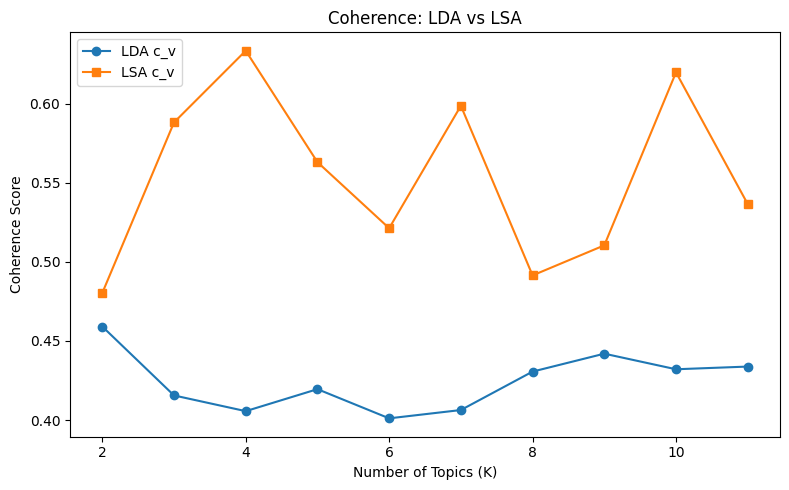

In [ ]:
# 6. Plot coherence scores for LDA vs LSA
k_vals_lda, coh_vals_lda = zip(*lda_coh)
k_vals_lsa, coh_vals_lsa = zip(*lsa_coh)

plt.figure(figsize=(8,5))
plt.plot(k_vals_lda, coh_vals_lda, marker='o', label='LDA c_v')
plt.plot(k_vals_lsa, coh_vals_lsa, marker='s', label='LSA c_v')
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.title('Coherence: LDA vs LSA')
plt.legend()
plt.tight_layout()
plt.show()

Best LDA K: 2, Best LSA K: 4

LDA Topics:
Topic 1: ['would', 'know', 'like', 'people', 'also', 'think', 'time', 'thing']
Topic 2: ['would', 'program', 'entry', 'think', 'time', 'year', 'also', 'need']

LSA Topics:
Topic 1: ['president', 'stephanopoulos', 'program', 'file', 'think', 'package', 'entry', 'would']
Topic 2: ['stephanopoulos', 'entry', 'president', 'file', 'think', 'available', 'know', 'said']
Topic 3: ['entry', 'data', 'available', 'image', 'section', 'rule', 'program', 'build']
Topic 4: ['stephanopoulos', 'administration', 'russian', 'russia', 'senior', 'official', 'government', 'program']


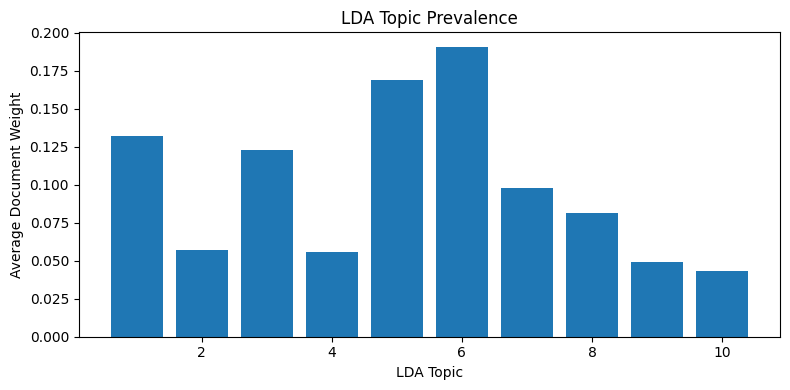

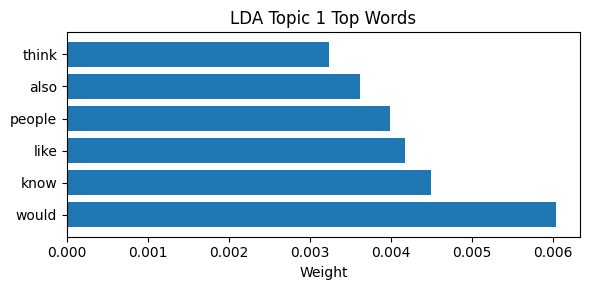

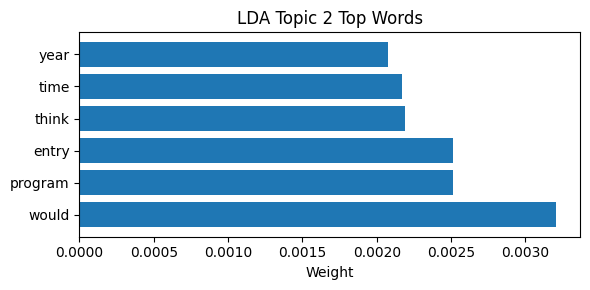

In [ ]:
# 7. Identify best K by highest coherence
best_lda_k = max(lda_coh, key=lambda x: x[1])[0]
best_lsa_k = max(lsa_coh, key=lambda x: x[1])[0]
print(f"Best LDA K: {best_lda_k}, Best LSA K: {best_lsa_k}")

# 8. Retrain models on optimal K
best_lda = gensim.models.LdaModel(corpus=assignment4_ambica_corpus, id2word=assignment4_ambica_dict,
                                  num_topics=best_lda_k, random_state=42, passes=5)
best_lsa = gensim.models.LsiModel(corpus=assignment4_ambica_corpus, id2word=assignment4_ambica_dict,
                                  num_topics=best_lsa_k)

# 9. Display topics
print("\nLDA Topics:")
for i, topic in best_lda.show_topics(formatted=False, num_topics=best_lda_k, num_words=8):
    print(f"Topic {i+1}: {[word for word, _ in topic]}")

print("\nLSA Topics:")
for i, topic in best_lsa.show_topics(formatted=False, num_topics=best_lsa_k, num_words=8):
    print(f"Topic {i+1}: {[word for word, _ in topic]}")

# Average weight per topic across documents
lda_topic_weights = assignment4_ambica_lda_topics.mean(axis=0)
plt.figure(figsize=(8,4))
plt.bar(range(1, K+1), lda_topic_weights)
plt.xlabel('LDA Topic')
plt.ylabel('Average Document Weight')
plt.title('LDA Topic Prevalence')
plt.tight_layout()
plt.show()

for t in range(best_lda_k):
    plt.figure(figsize=(6,3))
    terms = best_lda.get_topic_terms(t, topn=6)
    words = [assignment4_ambica_dict[id] for id, _ in terms]
    weights = [weight for _, weight in terms]
    plt.barh(words, weights)
    plt.xlabel('Weight')
    plt.title(f'LDA Topic {t+1} Top Words')
    plt.tight_layout()
    plt.show()

# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



In [ ]:
!pip install numpy>=1.24 --quiet
!pip uninstall -y bertopic
!pip install bertopic[all] --quiet
!pip install gensim --quiet
!pip install --upgrade h5py jax jaxlib --quiet

Found existing installation: bertopic 0.17.0
Uninstalling bertopic-0.17.0:
  Successfully uninstalled bertopic-0.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 7.3 MB/s eta 0:00:00


In [ ]:
import warnings
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import PCA


warnings.filterwarnings("ignore")
logging.getLogger("gensim").setLevel(logging.ERROR)

# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:


import warnings
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")
logging.getLogger("gensim").setLevel(logging.ERROR)


In [ ]:

assignment4_ambica_df = pd.read_csv('/content/assignment3_file.csv')

assignment4_ambica_texts = assignment4_ambica_df['clean_text'].tolist()


In [ ]:

assignment4_ambica_k = 10
assignment4_ambica_model = BERTopic(
    nr_topics=assignment4_ambica_k,
    calculate_probabilities=True
)
assignment4_ambica_topics, assignment4_ambica_probs = assignment4_ambica_model.fit_transform(
    assignment4_ambica_texts
)


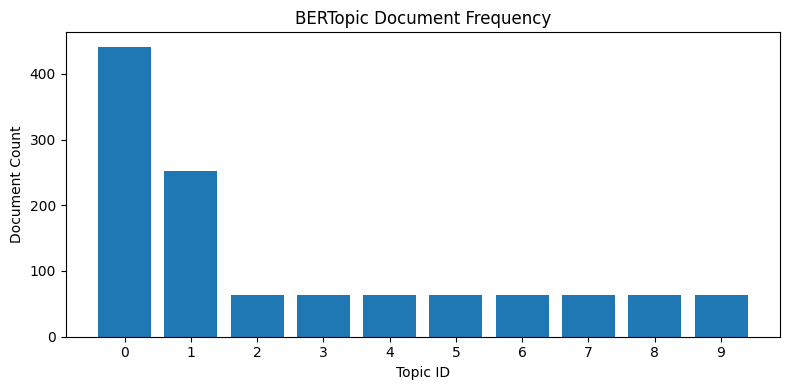

In [ ]:
assignment4_ambica_info = assignment4_ambica_model.get_topic_info()
plt.figure(figsize=(8,4))
plt.bar(
    assignment4_ambica_info['Topic'].astype(str),
    assignment4_ambica_info['Count']
)
plt.xlabel('Topic ID')
plt.ylabel('Document Count')
plt.title('BERTopic Document Frequency')
plt.tight_layout()
plt.show()


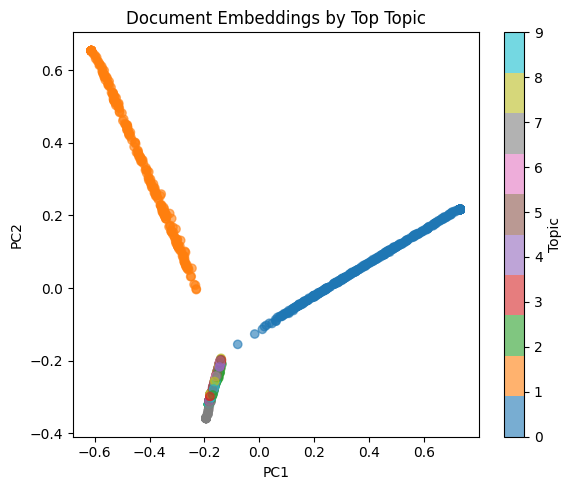

In [ ]:

pca = PCA(n_components=2, random_state=42)
assignment4_ambica_proj = pca.fit_transform(assignment4_ambica_probs)

plt.figure(figsize=(6,5))
scatter = plt.scatter(
    assignment4_ambica_proj[:,0],
    assignment4_ambica_proj[:,1],
    c=assignment4_ambica_topics,
    cmap='tab10',
    alpha=0.6
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Document Embeddings by Top Topic')
plt.colorbar(scatter, label='Topic')
plt.tight_layout()
plt.show()


In [ ]:

def assignment4_ambica_calc_coherence(docs, k_min=2, k_max=15):
    tokenized = [doc.split() for doc in docs]
    dictionary = Dictionary(tokenized)
    corpus = [dictionary.doc2bow(text) for text in tokenized]
    coh_scores = []
    for k in range(k_min, k_max+1):
        model_k = BERTopic(nr_topics=k, calculate_probabilities=False)
        topics_k, _ = model_k.fit_transform(docs)
        # gather top words per topic
        kw = [
            [w for w,_ in model_k.get_topic(t)]
            for t in sorted(set(topics_k)) if t != -1
        ]
        cm = CoherenceModel(
            topics=kw,
            texts=tokenized,
            dictionary=dictionary,
            coherence='c_v'
        )
        score = cm.get_coherence()
        coh_scores.append((k, score))
        print(f"K={k}: Coherence={score:.4f}")
    return coh_scores

assignment4_ambica_coh_scores = assignment4_ambica_calc_coherence(
    assignment4_ambica_texts, k_min=2, k_max=15
)


K=2: Coherence=0.5147
K=3: Coherence=0.4818


In [ ]:

ks, scores = zip(*assignment4_ambica_coh_scores)
plt.figure(figsize=(7,4))
plt.plot(ks, scores, marker='o')
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score (c_v)')
plt.title('BERTopic Coherence vs. K')
plt.tight_layout()
plt.show()


In [ ]:

print("\nTop terms per topic for K =", assignment4_ambica_k)
for topic_id in range(assignment4_ambica_k):
    terms = assignment4_ambica_model.get_topic(topic_id)
    print(f"Topic {topic_id}: {[w for w,_ in terms[:8]]}")


In [ ]:

assignment4_ambica_model.visualize_barchart(
    top_n_topics=assignment4_ambica_k, n_words=15,
    width=400, height=400
)
assignment4_ambica_model.visualize_hierarchy(
    top_n_topics=assignment4_ambica_k, width=600, height=600
)


In [ ]:

sim_matrix = assignment4_ambica_model.topic_similarity(
    topics=list(range(assignment4_ambica_k))
)
plt.figure(figsize=(6,5))
plt.imshow(sim_matrix, interpolation='nearest')
plt.colorbar()
plt.title('Topic Similarity Heatmap')
plt.xlabel('Topic')
plt.ylabel('Topic')
plt.tight_layout()
plt.show()


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
import random
import re
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
import logging
from sklearn.datasets import fetch_20newsgroups
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore, CoherenceModel
import matplotlib.pyplot as plt


In [ ]:
# 0. Suppress warnings and gensim logs
warnings.simplefilter('ignore')
logging.getLogger('gensim').setLevel(logging.ERROR)

# 1. Fetch data and sample
news = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'))
random.seed(42)
sample_posts = random.sample(news.data, 2000)
posts_df = pd.DataFrame({'raw_post': sample_posts})

# 2. Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# 3. Initialize preprocessing tools
tokenizer = RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# 4. Define text cleaning function
def assignment4_ambica_clean_text(doc):
    doc = doc.lower()
    tokens = tokenizer.tokenize(doc)
    clean_tokens = [lemmatizer.lemmatize(tok) for tok in tokens
                    if tok not in stop_words and len(tok) > 3]
    return clean_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# 5. Apply cleaning
posts_df['tokens'] = posts_df['raw_post'].apply(assignment4_ambica_clean_text)
token_lists = posts_df['tokens'].tolist()

# 6. Build dictionary and corpus
term_dictionary = Dictionary(token_lists)
bow_corpus = [term_dictionary.doc2bow(tokens) for tokens in token_lists]

# 7. Compute coherence for K = 5..15
coherence_data = []
for num_topics in range(5, 16):
    lda_model_k = LdaMulticore(
        corpus=bow_corpus,
        id2word=term_dictionary,
        num_topics=num_topics,
        random_state=42,
        workers=2
    )
    coherence_model = CoherenceModel(
        model=lda_model_k,
        texts=token_lists,
        dictionary=term_dictionary,
        coherence='c_v'
    )
    coh_score = coherence_model.get_coherence()
    coherence_data.append((num_topics, coh_score))
    print(f"Number of Topics = {num_topics}, Coherence = {coh_score:.4f}")

Number of Topics = 5, Coherence = 0.4953
Number of Topics = 6, Coherence = 0.4838
Number of Topics = 7, Coherence = 0.5056
Number of Topics = 8, Coherence = 0.4746
Number of Topics = 9, Coherence = 0.4708
Number of Topics = 10, Coherence = 0.4764
Number of Topics = 11, Coherence = 0.4716
Number of Topics = 12, Coherence = 0.4797
Number of Topics = 13, Coherence = 0.4672
Number of Topics = 14, Coherence = 0.4611
Number of Topics = 15, Coherence = 0.4637


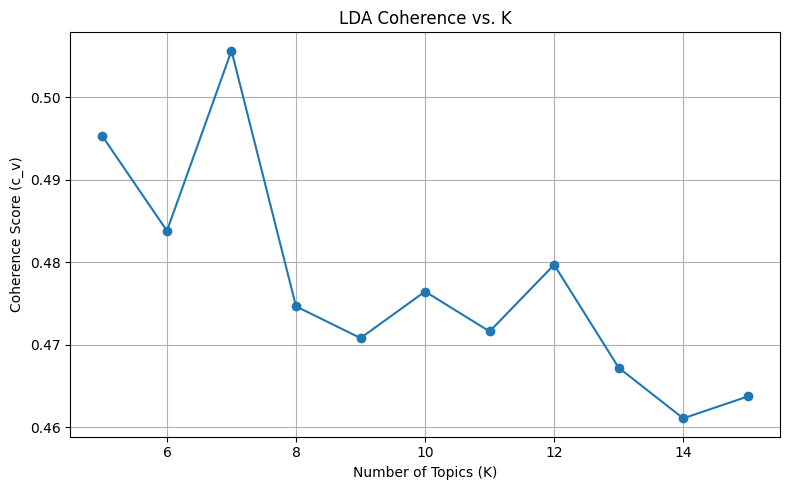


Optimal number of topics: 7


In [ ]:
# 8. Plot coherence curve
ks, scores = zip(*coherence_data)
plt.figure(figsize=(8,5))
plt.plot(ks, scores, marker='o')
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score (c_v)')
plt.title('LDA Coherence vs. K')
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Determine optimal K
best_k = max(coherence_data, key=lambda x: x[1])[0]
print(f"\nOptimal number of topics: {best_k}")




In [ ]:
# 10. Train final LDA model
final_lda_model = LdaMulticore(
    corpus=bow_corpus,
    id2word=term_dictionary,
    num_topics=best_k,
    random_state=42,
    workers=2
)

# 11. Display top terms per topic
print("\nTop terms per topic:")
for idx, topic_terms in final_lda_model.show_topics(num_topics=best_k, num_words=10, formatted=False):
    terms = [word for word, _ in topic_terms]
    print(f"Topic {idx+1}: {', '.join(terms)}")


Top terms per topic:
Topic 1: would, also, think, people, time, like, system, thing, know, make
Topic 2: would, know, time, also, think, like, people, want, right, could
Topic 3: think, work, people, would, like, also, time, know, year, drive
Topic 4: would, know, like, people, could, year, good, time, anyone, well
Topic 5: file, would, time, think, know, like, program, people, system, well
Topic 6: people, know, like, would, something, well, make, even, time, also
Topic 7: would, also, know, think, like, well, people, year, make, could


In [ ]:
# Cell: Install & Imports
!pip install openai==0.28 --quiet

import openai

# 1. Paste your OpenAI key here
assignment4_ambica_openai_key = "sk-..."   # ← your key here
openai.api_key = assignment4_ambica_openai_key

# 2. Define a summarization helper
def assignment4_ambica_gpt_topic_summary(assignment4_ambica_keywords):
    assignment4_ambica_prompt = (
        "Generate a concise, human‑readable summary for a topic based on these keywords: "
        + ", ".join(assignment4_ambica_keywords)
    )
    assignment4_ambica_response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": assignment4_ambica_prompt}],
        max_tokens=60,
        temperature=0.7
    )
    return assignment4_ambica_response.choices[0].message.content.strip()

# 3. Prepare your topic list (example from an LDA run)
# If you have:
#   assignment4_ambica_topics_list = final_lda_model.show_topics(
#       num_topics=assignment4_ambica_best_k, num_words=10, formatted=False
#   )
# or for BERTopic:
#   assignment4_ambica_topics_list = [
#       (tid, assignment4_ambica_model.get_topic(tid))
#       for tid in range(assignment4_ambica_k)
#   ]

# 4. Generate and print summaries
print("\n=== GPT‑3.5 Topic Summaries ===")
for assignment4_ambica_idx, assignment4_ambica_topic_terms in assignment4_ambica_topics_list:
    # extract just the words
    assignment4_ambica_keywords = [w for w, _ in assignment4_ambica_topic_terms]
    assignment4_ambica_summary = assignment4_ambica_gpt_topic_summary(assignment4_ambica_keywords)
    print(f"Topic {assignment4_ambica_idx+1}: {assignment4_ambica_summary}")


# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
import warnings
import logging
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from hdbscan import HDBSCAN
from bertopic import BERTopic
from umap import UMAP

In [ ]:
# 1. Suppress warnings and gensim logs
warnings.filterwarnings('ignore')
logging.getLogger('gensim').setLevel(logging.ERROR)

# 2. Fetch and sample data
random.seed(123)
news_data = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'))
sampled_posts = random.sample(news_data.data, 2000)
ambica_df = pd.DataFrame(sampled_posts, columns=['content'])

# 3. Generate embeddings
ambica_embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')
ambica_embeddings = ambica_embedder.encode(
    ambica_df['content'].tolist(), show_progress_bar=True
)

In [ ]:
# 4. Custom clustering with HDBSCAN
ambica_clusterer = HDBSCAN(
    min_cluster_size=10,
    metric='euclidean',
    cluster_selection_method='eom'
)

# 5. TF-IDF vectorizer (ngram up to trigrams)
ambica_vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    max_df=0.90,
    min_df=5
)


In [ ]:
# 6. Build and fit BERTopic
ambica_model = BERTopic(
    embedding_model=ambica_embedder,
    hdbscan_model=ambica_clusterer,
    vectorizer_model=ambica_vectorizer,
    calculate_probabilities=True,
    verbose=False
)
ambica_topics, ambica_probs = ambica_model.fit_transform(
    ambica_df['content'], ambica_embeddings
)

In [ ]:
# 7. Display topic info and top terms
ambica_info = ambica_model.get_topic_info()
print(ambica_info.head())

for topic_id in ambica_info['Topic'].unique():
    if topic_id == -1:
        continue
    terms = ambica_model.get_topic(topic_id)
    print(f"Topic {topic_id}: {terms[:8]}")

# 8. Topic frequency bar chart
plt.figure(figsize=(8,4))
plt.bar(
    ambica_info['Topic'].astype(str),
    ambica_info['Count']
)
plt.xlabel('Topic')
plt.ylabel('Document Count')
plt.title('Modified BERTopic: Topic Frequencies')
plt.tight_layout()
plt.show()

In [ ]:
# 9. UMAP projection of embeddings colored by topic
umap_model = UMAP(
    n_neighbors=15,
    n_components=2,
    metric='cosine',
    random_state=42
)
ambica_umap = umap_model.fit_transform(ambica_embeddings)
plt.figure(figsize=(6,5))
plt.scatter(
    ambica_umap[:,0],
    ambica_umap[:,1],
    c=ambica_topics,
    cmap='tab10',
    s=10,
    alpha=0.7
)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP of Documents by Topic')
plt.colorbar(label='Topic')
plt.tight_layout()
plt.show()

In [ ]:
# 10. Visualize top keywords bar chart
ambica_model.visualize_barchart(
    top_n_topics=8,
    n_words=12,
    width=400,
    height=400
)

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:





'''